# Week 2: Network Connectivity




# Clustering coefficient

Triadic closure: The tendency of people who share connections becoming connected themselves. If we have a lot of friends in common, we will likely eventually meet. How can we measure that prevalence?

Another way of referring to triadic closure is *clustering*. We will measure clustering from the point of view of a single node. 

**Local clustering coefficient of a node**: The fraction of pairs of the node's friends that are friends with each other.

Do an example:

* Number of C's friends: $d_c$ = 4 (the "degree" of C)  
* Number of pairs of C's friends: $d_c *(d_c -1)/2 = 6$  
* Number of pairs of C's friends who are friends: 2  
* Local clustering coefficient of C = 2/6 = 1/3  



You can also measure the **Global Clustering Coefficient** in one of two ways:  

1. By taking the average local clustering coefficient with `nx.average_clustering(G)`.  
2. By measuring **transitivity**, the ratio of number of triangles and number of open triads.  
    i. An open triad is three nodes that are connected by only two edges (one edge short of making a triangle). A triangle is actually make up of three open triads when you leave out each edge.
    ii. Calculate transitivity as 3 * Number of closed triads / Number of open triads.  
    iii. Use `Networkx` to get the transitivy of the network. `nx.transitivity(G)`  
    iv. Transitivity weights the nodes with a large degree higher.

    

# Distance measures

Sometimes we like to know how "far" nodes are from each other. Or, can we say which nodes are closest or farthest? How do we develop a concept of distance between nodes.

**Path**: A sequence of nodes connected by an edge. For example, to go from node G to C you can go G-F-C or G-F-E-C.  

How far is node A from H?  
- Path 1: A-B-C-E-H (4 "hops")  
- Path 2: A-B-C-F-E-H (5 "hopes")

Define the *path length* as the number of steps a path contains from beginning to end.

**Distance**: The length of the shortest possible path between two nodes. In the case above, the length is 4. 

In networkX:  

    nx.shortest_path(G,'A','H')
    Out: ['A','B','C','E','H']
    
    nx.shortest_path_length(G, 'A', 'H')
    Out: 4
    
How can we find the distance between a single node and all other nodes? This is easy to do manually but it can be very tedious. Start with a **Breadth-first search**: A systematic and efficient procedure for computing distances from a node to all other nodes in a large network by "discovering" nodes in layers. This creates a map of layers, where each layer has a set of nodes at the next distance away. 

In `networkX`: 

    T = nx.bfs_tree(G, 'A')
    Out: [('A','K'),('A','B'),('B','C'),('C','E'),('C','F'),('E','I'),('E','H'),('E','D'),('F','G'),('I','J')]
    
    nx.shortest_path_length(G,'A')
    Out: {'A':0, 'B':1, 'C':2, 'D':2, 'E':3, 'F':3, 'G':4, 'H':4, 'I':4, 'J':5, 'K':1}
    

How do we characterize the distance between all nodes in the graph? Are they close together or far apart? Which are close to each other and which are far from each other?

Calculate the **average distance**:

    nx.average_shortest_path_length(G)  
    Out: 2.527272727
    
Calculate the **diameter** (maximum distance between any pair of nodes):

    nx.diameter(G)  
    Out: 5
    
Calculate the **eccentricity** of a node (the largest distance between that node and each other nodes):

    nx.eccentricity(G)  
    Out: {'A':5, 'B':4, 'C':3, 'D':4, 'E':3, 'F':3, 'G':4, 'H':4, 'I':4, 'J':5, 'K':5}
    
Calculate the **radius** of the graph (the minimum eccentricity):

    nx.radius(G)  
    Out: 3  
    
Now summarize the distances between all pairs of nodes in a graph. 
    
Calculate the **periphery** of the graph (the set of nodes that have eccentricity equal to the diameter):

    nx.periphery(G)
    Out: ['A','K','J']
    
Calculate the **center** of the graph (the set of nodes with eccentricity equal to the radius:

    nx.center(G)
    Out: ['C','E','F']

Look at the karate club network example data. 

In [4]:
import networkx as nx

In [5]:
G = nx.karate_club_graph()

In [6]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

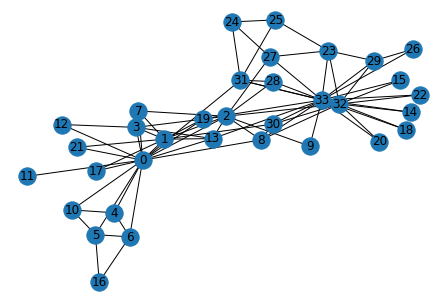

In [8]:
nx.draw(G, with_labels=True)

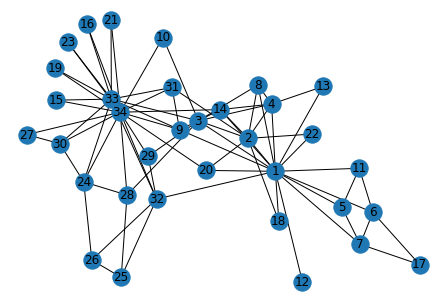

In [9]:
# Renumber the nodes starting at 1
G = nx.convert_node_labels_to_integers(G, first_label=1)
nx.draw(G, with_labels=True)

In [10]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22), (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22), (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29), (3, 33), (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (6, 7), (6, 11), (6, 17), (7, 17), (9, 31), (9, 33), (9, 34), (10, 34), (14, 34), (15, 33), (15, 34), (16, 33), (16, 34), (19, 33), (19, 34), (20, 34), (21, 33), (21, 34), (23, 33), (23, 34), (24, 26), (24, 28), (24, 30), (24, 33), (24, 34), (25, 26), (25, 28), (25, 32), (26, 32), (27, 30), (27, 34), (28, 34), (29, 32), (29, 34), (30, 33), (30, 34), (31, 33), (31, 34), (32, 33), (32, 34), (33, 34)])

In [13]:
# Calculate some distance metrics
print(nx.average_shortest_path_length(G))
print(nx.radius(G))
print(nx.diameter(G))
print(nx.center(G))
print(nx.periphery(G))

2.408199643493761
3
5
[1, 2, 3, 4, 9, 14, 20, 32]
[15, 16, 17, 19, 21, 23, 24, 27, 30]


When you look for these nodes, you see that the center nodes are in the center and the periphery nodes are on the edges.

Take note of node 34, which looks to be central, but it has one node that is length 4 away (node 17). Thus, the set of center nodes is very sensitive.

# Connected components

An undirected graph is **connected** if, for every pair of nodes, there is a path between them. Check with `networkx`:

    nx.is_connected(G)
    Out: True
    
If a graph is not connected, then there are separate communities with no connections to each other, like islands. Those islands are called connected components...

A **connected component** is a subset of nodes such that: (1) Every node in the subset has a path to every other node, and (2) No other node inside the subset has a path to any node outside the subset  


    nx.number_connected_components(G)  
    Out: 3
    
    sorted(nx.connected_components(G))
    Out: [{'A','B','C','D','E'},{'F','G','H','I','J'},{'K','L','M','N','O'}]  
    
    nx.node_connected_component(G,'M')  
    Out: {'K','L','M','N','O'}

Connectivity in directed graphs: A graph is **strongly connected** if, for every pair of nodes $u$ and $v$, there is a directed path from $u$ to $v$ and *another* directed graph from $v$ to $u$. The directed paths don't have to be direct connections between the two, but rather can travel through other nodes.  

    nx.is_strongly_connected(G)  
    Out: False  
    
A directed graph is **weakly connected** if replacing all directed edges with undirected edges produces a connected undirected graph. That means that all nodes have paths to each other, just not necessarily in the right direction. 

    nx.is_weakly_connected(G)  
    Out: True  
    
A **strongly connected component** is a subset of nodes such that: (1) every node in the subset has a directed path to every other node, and (2) no other node outside the subset has a directed path to and from any node in the subset. (this subset is an island, but can have a one-way arrow connecting to another arrow)

    sorted(nx.strongly_connected_components(G))
    Out: [{M},{L},{K},{A,B,C,D,E,F,G,J,N,O},{H,I}]


# Network robustness

How does connectivity relate to the robustness of a network? Robustness is the ability of a network to maintain it's general structural properties (such as connectivity) when it faces failures or attacks, such as removal of nodes or edges. 

Examples: airport closures, internet router failures, power line failures

**Disconnecting a graph**:  
What is the smallest number of *nodes* that I would need to remove from a graph in order to disconnect it?  

    nx.node_connectivity(G_un)
    Out = 1
    
This says you only need to remove one node to disconnect it. Which node?
 
    nx.minimum_node_cut(G_un)
    Out: {'A'}
    
What is the smallest number of *edges* you would need to remove in order to disconnect the graph?

    nx.edge_connectivity(G_un)  
    Out: 2
    
Which edges?

    nx.minimum_edge_cut(G_un)
    Out: {('A','G'),('O','J')} 

Robust networks have large minimum node and edge cuts- you would have to remove a lot of nodes or edges in order to disconnect the network.

**Simple paths**: Imagine node G wants to send a message to node L by passing it along other nodes in a directed network. What options does G have for delivering the message? 

![fig/network_G_to_L.png](fig/network_G_to_L.png)

    sorted(nx.all_simple_paths(G, 'G', 'L')) 
    Out: [['G','A','N','L'],
         ['G','A','N','O','K','L'],
         ['G','A','N','O','L'],
         ['G','J','O','K','L'],
         ['G','J','O','L']]

What if an attacker wants to block the message from G to L? They are specifically interested in disrupting the communication from G to L. If they were going to try to do this, how many nodes would they need to remove?  

    nx.node_connectivity(G, 'G', 'L')
    Out: 2
    
Which nodes?

    nx.minimum_node_cut(G, 'G', 'L')
    Out: {'N','O'}
    
Let's do some sanity checking here. If we only removed 'O', could we still find a way to send the message? Yes- it's not enough to remove one of the nodes, you have to remove both.

If, instead we wanted to block this message by removing an edge, which edge would we need to remove?

    nx.edge_connectivity(G, 'G', 'L')
    Out: 2
    
Which edges?

    nx.minimum_edge_cut(G,'G','L')
    Out: {('A','N'), ('J','O')}
    
We need to remove A --> N and J --> O.

Quiz: If we wanted to block the message from H to O by removing the smallest possible number of edges from the network, which edges should we remove? 

In [14]:
import networkx as nx 

G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), 
                  ('G', 'A'), ('A', 'N'), ('B', 'C'), 
                  ('D', 'B'), ('B', 'E'), ('C', 'D'), 
                  ('E', 'C'), ('D', 'E'), ('E', 'D'), 
                  ('F', 'G'), ('I', 'F'), ('J', 'F'), 
                  ('H', 'G'), ('I', 'G'), ('G', 'J'), 
                  ('I', 'H'), ('H', 'I'), ('I', 'J'), 
                  ('J', 'O'), ('O', 'J'), ('K', 'M'), 
                  ('K', 'L'), ('O', 'K'), ('O', 'L'), 
                  ('N', 'L'), ('L', 'M'), ('N', 'O')])

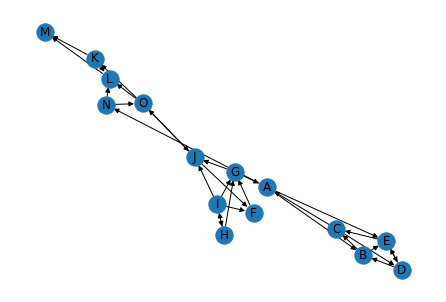

In [15]:
nx.draw(G, with_labels=True)

In [16]:
nx.minimum_edge_cut(G, 'H','O')

{('J', 'O'), ('N', 'O')}

# Simple network visualizations

NetworkX does provide some visualization capability. 

This is in another notebook: `week_2_lab_visualizing_with_networkx`